# Sample Project - Forecasting Rainfall

Data obtained from: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

Based on how the dataset looks, I will attempt to use OLS to determine the values of this Beta vector:

$ RainTomorrow = \alpha + \beta '\bullet \chi + \epsilon $

    where the dependent variable is the likelihood of RainTomorrow, and the vector of regressor 
    variables X will be determined later

In [59]:
#installing some common packages
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
#importing csv file
df1 = pd.read_csv('weatherAUS.csv')

### Cleaning data

In [62]:
df1.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
142868,2014-09-16,Katherine,19.1,36.8,0.0,8.0,NaN,ENE,37.0,WNW,...,60.0,26.0,1014.4,1009.6,2.0,2.0,26.7,35.5,No,No
58415,2009-08-31,Bendigo,6.1,14.9,0.4,1.8,NaN,NW,46.0,NW,...,95.0,77.0,1016.7,1015.1,8.0,7.0,9.4,14.1,No,No
61171,2017-06-15,Bendigo,3.9,15.3,0.0,NaN,NaN,SSE,13.0,SSE,...,98.0,70.0,1028.4,1025.9,3.0,NaN,7.7,14.1,No,No
99132,2016-06-10,Adelaide,12.3,16.2,2.4,NaN,NaN,NW,39.0,WNW,...,74.0,70.0,1021.7,1021.7,NaN,NaN,13.7,15.5,Yes,Yes
138520,2015-11-13,AliceSprings,21.2,35.6,0.0,14.4,12.8,SE,46.0,SSE,...,22.0,17.0,1015.7,1011.5,1.0,3.0,28.4,34.2,No,No
82929,2014-07-14,Dartmoor,3.1,12.1,0.0,1.4,0.3,NNE,20.0,ENE,...,100.0,89.0,1030.7,1026.6,NaN,NaN,4.1,10.7,No,No
53410,2012-09-09,MountGinini,-1.9,10.7,5.8,NaN,NaN,WSW,54.0,S,...,NaN,74.0,NaN,NaN,NaN,NaN,NaN,10.0,Yes,No
20344,2015-05-13,NorahHead,12.9,17.3,0.0,NaN,NaN,SW,56.0,W,...,44.0,39.0,1015.7,1016.3,NaN,NaN,15.5,14.8,No,No
77437,2015-12-22,Portland,10.4,19.7,0.0,5.4,13.4,SE,41.0,ESE,...,58.0,52.0,1024.7,1021.8,7.0,NaN,15.1,17.7,No,No
49002,2017-06-05,Canberra,-3.8,12.7,0.0,NaN,NaN,NNW,24.0,NaN,...,96.0,55.0,1026.8,1022.8,NaN,NaN,1.4,12.5,No,No


In [63]:
df1['Date'].min()

'2007-11-01'

In [64]:
df1['Date'].max()

'2017-06-25'

In [65]:
# there's a bunch of nulls in many of the columns, which seems to just be equivalent to 0. So let's fill in nulls with 0

df1.fillna(0, inplace=True)
df1.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
119198,2013-07-17,PerthAirport,8.7,15.0,12.2,2.4,8.5,SSW,57.0,S,...,65.0,43.0,1020.4,1020.4,1.0,3.0,10.4,14.2,Yes,No
36065,2016-03-19,SydneyAirport,15.2,21.6,1.0,5.4,11.0,W,48.0,W,...,40.0,47.0,1010.9,1011.4,1.0,1.0,18.6,20.9,No,No
54186,2014-12-23,MountGinini,10.1,18.4,11.4,0.0,0.0,NNW,43.0,NW,...,98.0,72.0,0.0,0.0,0.0,0.0,11.7,17.7,Yes,Yes
136967,2011-06-15,AliceSprings,-3.4,16.7,0.0,3.0,10.0,ESE,33.0,NW,...,75.0,29.0,1026.5,1022.5,0.0,1.0,6.0,16.4,No,No
47988,2014-08-26,Canberra,6.2,13.7,12.6,0.0,0.0,ESE,46.0,SSE,...,82.0,82.0,1027.3,1026.3,8.0,8.0,10.5,11.2,Yes,No


In [66]:
#"RainToday" and "RainTomorrow" are recorded with yes/no. Let's turn that into 1/0
df1['RainToday']=df1['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)
df1['RainTomorrow']=df1['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

In [67]:
df1.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
32637,2015-01-25,Sydney,21.6,34.4,1.0,8.0,11.2,S,59.0,W,...,77.0,44.0,1003.1,1001.6,2.0,5.0,25.0,31.2,0,0
53888,2014-02-28,MountGinini,7.8,10.1,0.0,0.0,0.0,ENE,28.0,ENE,...,98.0,97.0,0.0,0.0,0.0,0.0,8.5,9.6,0,0
103044,2010-05-07,Nuriootpa,6.3,18.4,0.0,1.6,7.4,NW,31.0,WNW,...,79.0,67.0,1024.9,1022.9,2.0,6.0,14.4,17.1,0,0
105839,2009-10-05,Woomera,10.6,22.5,0.0,7.4,11.7,SSE,41.0,SSE,...,72.0,31.0,1025.7,1023.4,1.0,1.0,13.7,21.3,0,0
25181,2011-11-20,Penrith,19.8,35.7,0.0,0.0,0.0,W,52.0,S,...,71.0,36.0,0.0,0.0,0.0,0.0,24.4,29.9,0,0


In [68]:
# data looks clean now
data=df1

### Exploratory analysis

<AxesSubplot:>

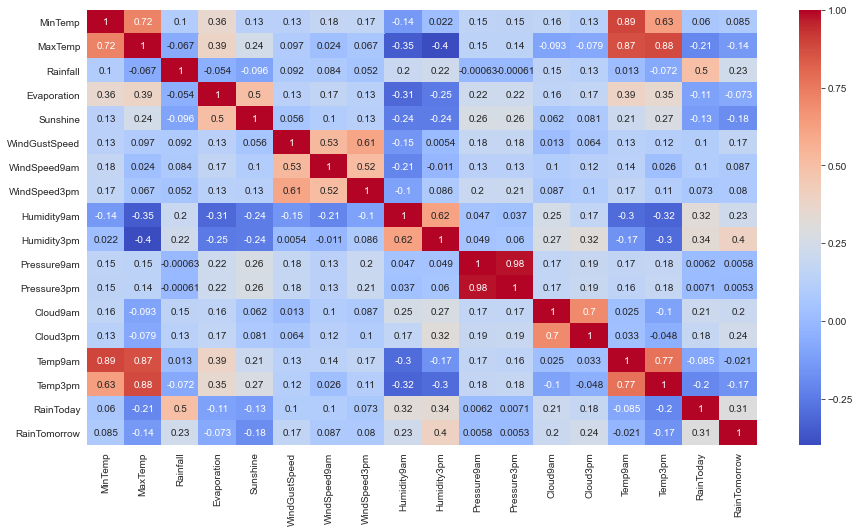

In [69]:
# getting a quick understanding of what variables can best predict RainTomorrow
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)


RainTomorrow looks to be most correlated with Rainfall, humidity, clouds, and RainToday.
To avoid multicolinearity, I will only use Rainfall as a variable, rather than both Rainfall and RainToday.
By the same logic, I will only use Humidity3pm and Cloud3pm

So my regression equation is:

$ RainTomorrow = \alpha + \beta_1 Rainfall + \beta_2 Humidity3pm + \beta_3 Cloud3pm + \epsilon $

### Creating a regression

In [70]:
#install regression packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [71]:
#split data into regressor and outcome variables
X=data[['Rainfall','Humidity3pm','Cloud3pm']]
y=data[['RainTomorrow']]

X = sm.add_constant(X) #adding a constant to regressors
X.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Rainfall,Humidity3pm,Cloud3pm
0,1.0,0.6,22.0,0.0
1,1.0,0.0,25.0,0.0
2,1.0,0.0,30.0,2.0
3,1.0,0.0,16.0,0.0
4,1.0,1.0,33.0,8.0


In [72]:
y.head(5)

,RainTomorrow
0,0
1,0
2,0
3,0
4,0


In [74]:
#split data into training and testing sets so that I can see how well my model works afterwards
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #using 70% of the data to train regression

In [75]:
regression = sm.OLS(endog=y_train, exog=X_train, missing='raise').fit() #OLS regression, raise warning if nulls present

In [76]:
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           RainTomorrow   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     8001.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        01:07:35   Log-Likelihood:                -44054.
No. Observations:              101822   AIC:                         8.812e+04
Df Residuals:                  101818   BIC:                         8.816e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1412      0.003    -48.929      0.000      -0.147      -0.136
Rainfall        0.0070      0.000     49.886      0.000       0.007       0.007
Humidity3pm     0.0061   5.62e-05    107.817      0.000       0.006       0.006
Cloud3pm        0.0160      0.000     39.525      0.000       0.015       0.017
==============================================================================
Omnibus:                    13563.815   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19773.870
Skew:                           1.073   Prob(JB):                         0.00
Kurtosis:                       3.241   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Good sign that P values of all regressor variables are significant. F-test is also significant.

In [83]:
#generate predictions based on the remaining test data
predictions = regression.predict(X_test) 
predictions.head(5)

26191    0.245077
25452    0.119375
96666    0.161787
56739    0.595937
88977    0.293231
dtype: float64

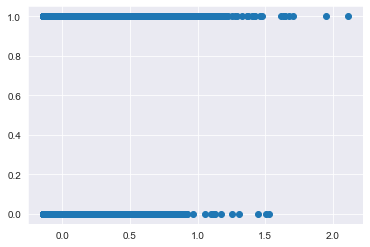

In [91]:
#visualize correlation of our predictions and actual RainTomorrow
plt.scatter(x=predictions,y=y_test)

#hard to see a good correlation, especially when y is a binary variable

In [86]:
#let's compare predictions vs actual
predictions_actual = pd.DataFrame(predictions,columns=['ChanceofRainTomorrow'])
predictions_actual['RainTomorrow']=y_test['RainTomorrow']
predictions_actual['Residual']=y_test['RainTomorrow']-predictions_actual['ChanceofRainTomorrow']
predictions_actual.head()

,ChanceofRainTomorrow,RainTomorrow,Residual
26191,0.245077,0,-0.245077
25452,0.119375,0,-0.119375
96666,0.161787,1,0.838213
56739,0.595937,1,0.404063
88977,0.293231,1,0.706769


<AxesSubplot:xlabel='Residual'>

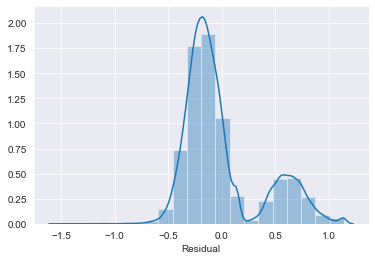

In [88]:
#check that errors look normally distributed
sns.distplot(predictions_actual['Residual'],bins=20)

Yikes residuals have a bimodal distribution, that doesn't look good. I think maybe one guess might be that there's a binary regressor variable that I didn't include in the regression? I'll try again and include RainToday as a regressor variable. Now that I think about it, RainToday and Rainfall are unlikely to be multicollinear because RainToday is just a binary variable, so it wouldn't really be a perfect linear transformation of Rainfall. In fact, I can see from the correlation graph that Rainfall and RainToday have a correlation of 0.5

### Creating a Regression v1

In [101]:
#split data into regressor and outcome variables
X_v1=data[['Rainfall','RainToday','Humidity3pm','Cloud3pm']]
y_v1=data[['RainTomorrow']]

X_v1 = sm.add_constant(X_v1) #adding a constant to regressors
X_v1.head(5)

,const,Rainfall,RainToday,Humidity3pm,Cloud3pm
0,1.0,0.6,0,22.0,0.0
1,1.0,0.0,0,25.0,0.0
2,1.0,0.0,0,30.0,2.0
3,1.0,0.0,0,16.0,0.0
4,1.0,1.0,0,33.0,8.0


In [102]:
#split data into training and testing sets so that I can see how well my model works afterwards
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X_v1, y_v1, test_size=0.3, random_state=1) #using 70% of the data to train regression

In [103]:
regression_v1 = sm.OLS(endog=y_train_v1, exog=X_train_v1, missing='raise').fit() #OLS regression, raise warning if nulls present

In [104]:
regression_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           RainTomorrow   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     6608.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        01:26:40   Log-Likelihood:                -43080.
No. Observations:              101822   AIC:                         8.617e+04
Df Residuals:                  101817   BIC:                         8.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1329      0.003    -46.417      0.000      -0.139      -0.127
Rainfall        0.0038      0.000     24.544      0.000       0.004       0.004
RainToday       0.1489      0.003     44.356      0.000       0.142       0.155
Humidity3pm     0.0055   5.73e-05     95.077      0.000       0.005       0.006
Cloud3pm        0.0148      0.000     36.990      0.000       0.014       0.016
==============================================================================
Omnibus:                    13082.721   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18815.896
Skew:                           1.045   Prob(JB):                         0.00
Kurtosis:                       3.252   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
#generate predictions based on the remaining test data
predictions_v1 = regression_v1.predict(X_test_v1) 
predictions_v1.head(5)

26191    0.323429
25452    0.101455
96666    0.139608
56739    0.670914
88977    0.260633
dtype: float64

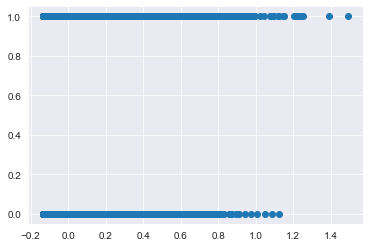

In [106]:
#visualize correlation of our predictions and actual RainTomorrow
plt.scatter(x=predictions_v1,y=y_test_v1)

In [107]:
#let's compare predictions vs actual
predictions_actual_v1 = pd.DataFrame(predictions_v1,columns=['ChanceofRainTomorrow'])
predictions_actual_v1['RainTomorrow']=y_test_v1['RainTomorrow']
predictions_actual_v1['Residual']=y_test_v1['RainTomorrow']-predictions_actual_v1['ChanceofRainTomorrow']
predictions_actual_v1.head()

,ChanceofRainTomorrow,RainTomorrow,Residual
26191,0.323429,0,-0.323429
25452,0.101455,0,-0.101455
96666,0.139608,1,0.860392
56739,0.670914,1,0.329086
88977,0.260633,1,0.739367


<AxesSubplot:xlabel='Residual'>

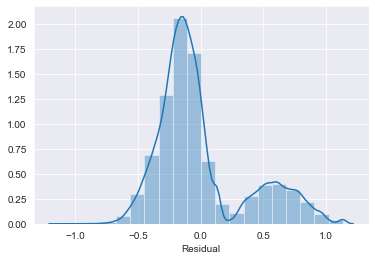

In [108]:
#check that errors look normally distributed
sns.distplot(predictions_actual_v1['Residual'],bins=20)

### Ending Thoughts

After some googling, I've realized my mistake. My dependent variable is a binary variable, while my regression equation generates predicted values in [0,1]. Therefore my residuals, true_y - predicted_y, will be distributed around a peak where the true_y is 1 and another peak where the true_y is 0.
The correct regression to model a binary event is a logistic regression model. 


### SQL Sample Code

/* 
very simple query where I pretend to join a table containing a monthly view of accounts, to a transaction-level table
that contains every transaction of every account. I attempt to find the monthly sum of payments from the transaction level table and attach it to the monthly view of accounts. 
Apologies if there's any mistakes as I haven't used SQL in quite a few months and I'm just visualizing what the tables would look like.
*/

create or replace table sb.user_xyz.analysis as (
select
    a.acct_id
    ,a.stmt_bgn_dt
    ,a.stmt_end_dt
    ,sum(b.trxn_amt) as payment 
    
    from 
    (select * from db.table_per_account_per_credit_card_statement --every account will have a new row every month
     where country = 'Canada'
     and status = 'active') as a
     
    left join 
    (select * from db.transaction_level_table  -- each transaction is recorded as a new row
     where country = 'Canada'
     and status = 'active'
     and trxn_type = 'payment'                 --I only want the transactions that are payments
     ) as b
     on a.acct_id = b.acct_id                  --join by matching accounts
     and b.trxn_dt >= a.stmt_bgn_dt            --make sure that the transactions happend after the start of the statement
     and b.trxn_dt <= a.stmt_end_dt            --make sure the transaction happened prior to the end of the statement
);